# Degree distribution

- Guardare grado di ogni nodo (se una riga ha 0 non interferisce)

- Istogramma distribuzione grado (: informazione su grado compattezza rete, quanto è connessa)

- Distribuzione temporale: è uniforme durante la giornata?

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Dataframe\\S2_degrees.csv')

In [3]:
count = data['degree'].sum()
count

4979808

In [4]:
count = 0
for i in range(0,len(data)):
    count += data['degree'].loc[i]
count

4979808

In [5]:
len(data[data['sector_hours'] == '[]'])
data2 = data[data['sector_hours']=='[]']
list=data2['flight'].unique()
list

array(['AFL1891_UGTB_UUEE_20170901092000',
       'AFL1893_UGTB_UUEE_20170901231500',
       'AFL2200_UUEE_EFHK_20170901152000',
       'AFL2206_UUEE_EFHK_20170901074500',
       'AHY9223_UBBB_UGTB_20170901043000',
       'AOJ75D_LDVA_LQBK_20170901053000',
       'AOS54_EGBJ_EGFF_20170901092000',
       'AUA165Q_LOWG_LOWI_20170901200500',
       'AUA929K_LOWW_LOWK_20170901181500',
       'AUA935T_LOWW_LOWK_20170901075500',
       'AUA93J_LOWW_LOWK_20170901210500',
       'AUA99J_LOWW_LOWK_20170901151500',
       'CAI040_EHEH_EHBK_20170901074000',
       'CLU517_UUEE_EFHK_20170901132000',
       'EGL08_EGHH_EGTE_20170901181500',
       'EZE610_EGFF_EGOV_20170901063500',
       'EZE611_EGOV_EGFF_20170901075500',
       'EZE612_EGFF_EGOV_20170901142500',
       'EZE613_EGOV_EGFF_20170901154000',
       'FDB713_OMDB_UGTB_20170901213000',
       'FDB8503_OMDB_UGTB_20170901013000',
       'FIN166_ULLI_EFHK_20170901090000',
       'FIN168_ULLI_EFHK_20170901024500',
       'FIN170_ULLI_EFHK_20

In [6]:
data['degree'].min()

0

In [7]:
data['degree'].max()

587

In [8]:
int(data['degree'].mean())

166

In [9]:
len(data[data['degree']>=200])

10343

In [10]:
data[data['degree']<=2]

,flight,sector_hours,degree
158,ABY244_OMSJ_UDYZ_20170901050500,"['UDDDALL_0700_0800_E', 'UDYZTA_0700_0800_E']",2
688,AFL1891_UGTB_UUEE_20170901092000,[],0
690,AFL1893_UGTB_UUEE_20170901231500,[],0
775,AFL2200_UUEE_EFHK_20170901152000,[],0
777,AFL2206_UUEE_EFHK_20170901074500,[],0
...,...,...,...
29099,WIF79N_ENRA_ENBO_20170901212500,['ENBDCH_2100_2200_E'],2
29148,WIF90A_ENNM_ENVA_20170901052500,['ENBDCH_0530_0600_E'],1
29188,WIF970_ENBV_ENBS_20170901073500,['ENBDE_0730_0800_E'],2
29208,WIF977_ENHF_ENTC_20170901215000,['ENBDNLE_2200_2300_E'],2


In [11]:
len(data[data['degree']==0])

70

# Boxplot

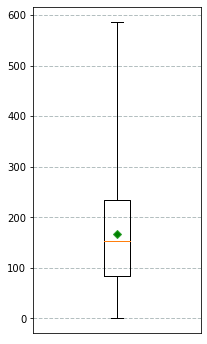

In [20]:
diamond = dict(markerfacecolor='g', marker='D')
x = [data['degree']]
plt.figure(figsize=(3,6))
plt.boxplot(x, whis='range', showmeans=True, meanprops=diamond)

plt.xticks([])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.yticks(np.linspace(0,600,7))

plt.savefig('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Plots\\S2_boxplot1.png')

# Istogramma

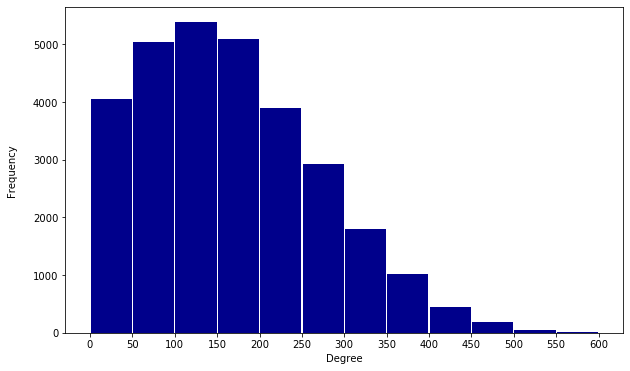

In [23]:
x = [data['degree']]
num_bins = 12
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,600), rwidth=0.97, facecolor='darkblue', alpha=1)

plt.xticks(np.linspace(0,600,13))
plt.xlabel('Degree')
plt.ylabel('Frequency\n')

plt.savefig('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Plots\\S2_histogram1.png')

In [12]:
small_deg = data[data['degree']<20]

In [13]:
data

,flight,sector_hours,degree
0,A6RTS_OMDW_EGGW_20170901055500,"['LTAAAEU67_0800_0900_E', 'LTAAANOR2_0900_1000...",400
1,AAB249_EBKT_LFMN_20170901070500,"['EBBUWLS_0700_0800_E', 'EBBUWHS_0700_0800_E',...",261
2,AAB249_LFMN_LIEO_20170901090500,"['LFMMMNST_0900_1000_E', 'LFMMBTAJ_0900_1000_E...",106
3,AAB25C_LOWW_UUMO_20170901143500,"['LZBBL33_1500_1600_E', 'LZBBU_1500_1600_E', '...",96
4,AAB571_EBBR_EGNV_20170901050500,"['EBBUNWC_0530_0600_E', 'EDYYB5KL_0500_0600_E'...",150
...,...,...,...
29912,XLF056_LFPG_MMUN_20170901153100,['LFFFTH_1600_1700_E' 'LFFFUZ_1600_1700_E' 'LF...,88
29913,XLF1451_LFML_LFPG_20170901030500,['LFMMMALY_0330_0400_E' 'LFMMWW_0330_0400_E' '...,30
29914,XRO546_LFMD_EGCC_20170901180000,['LFMMSBAM_1800_1900_E' 'LFMMB12_1800_1900_E' ...,215
29915,XRO552_EHAM_LFMD_20170901150000,['EHAACOD_1500_1600_E' 'EHAASECT3_1520_1600_E'...,331


In [14]:
am1 = data[(data['flight'].str[-6:-4])=='01']
am2 = data[(data['flight'].str[-6:-4])=='02']
am3 = data[(data['flight'].str[-6:-4])=='03']
am4 = data[(data['flight'].str[-6:-4])=='04']
am5 = data[(data['flight'].str[-6:-4])=='05']
am6 = data[(data['flight'].str[-6:-4])=='06']
am7 = data[(data['flight'].str[-6:-4])=='07']
am8 = data[(data['flight'].str[-6:-4])=='08']
am9 = data[(data['flight'].str[-6:-4])=='09']
am10 = data[(data['flight'].str[-6:-4])=='10']
am11 = data[(data['flight'].str[-6:-4])=='11']
am12 = data[(data['flight'].str[-6:-4])=='12']
pm1 = data[(data['flight'].str[-6:-4])=='13']
pm2 = data[(data['flight'].str[-6:-4])=='14']
pm3 = data[(data['flight'].str[-6:-4])=='15']
pm4 = data[(data['flight'].str[-6:-4])=='16']
pm5 = data[(data['flight'].str[-6:-4])=='17']
pm6 = data[(data['flight'].str[-6:-4])=='18']
pm7 = data[(data['flight'].str[-6:-4])=='19']
pm8 = data[(data['flight'].str[-6:-4])=='20']
pm9 = data[(data['flight'].str[-6:-4])=='21']
pm10 = data[(data['flight'].str[-6:-4])=='22']
pm11 = data[(data['flight'].str[-6:-4])=='23']
pm12 = data[(data['flight'].str[-6:-4])=='00']

In [15]:
am10

,flight,sector_hours,degree
5,AAB678_LEIB_LPPR_20170901100000,"['LECPIAX_0900_1000_E', 'LECPIRX_0900_1000_E',...",201
7,AAB713_EBKT_EHBK_20170901103000,"['EBBUWLS_1000_1100_E', 'EBBUHLC_1000_1100_E',...",77
19,AAF255_LFPG_DAAG_20170901100000,"['LFFFDODG_1000_1100_E', 'LFBBP12_1000_1100_E'...",191
58,AAF738_DAAG_LFBD_20170901100500,"['LECBLVS_0900_1000_E', 'LECBBAS_1000_1040_E',...",192
100,ABG8070_LTAI_UNBB_20170901102000,"['LTAIALL_1100_1200_E', 'LTAAASOU_1100_1200_E'...",130
...,...,...,...
29853,WZZ9NA_LROP_LCLK_20170901104900,['LRBBKNL16_1100_1200_E' 'LBSRVNL4_1100_1200_E...,187
29855,WZZ9PV_LIBD_LROP_20170901105500,['LIBBME_1100_1200_E' 'LDZOULS_1100_1200_E' 'L...,272
29862,WZZ9XC_EPGD_EDDH_20170901100000,['EPWWBDL_1000_1100_E' 'EDUUOSE1O_1000_1100_E'...,100
29866,XGO3GW_LFMN_EGLF_20170901102000,['LFMMMNST_1000_1100_E' 'LFMMB1_1000_1100_E' '...,245


In [16]:
morning = pd.concat([am6,am7,am8,am9,am10,am11])

In [17]:
afternoon = pd.concat([am12,pm1,pm2,pm3,pm4,pm5])

In [18]:
evening = pd.concat([pm6,pm7,pm8,pm9,pm10,pm11])

In [19]:
night = pd.concat([pm12,am1,am2,am3,am4,am5])

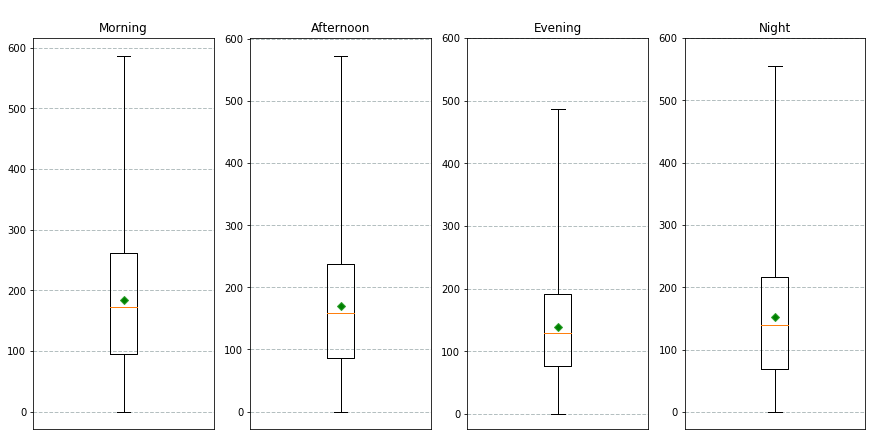

In [27]:
fig, axs = plt.subplots(1, 4, figsize = (12,6), constrained_layout=True)

#fig.suptitle('\nNode degree Boxplot\n', fontsize=20)

diamond = dict(markerfacecolor='g', marker='D')

axs[0].boxplot(morning['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[0].set_title('Morning')
axs[0].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[0].set_yticks(np.linspace(0,600,7))
axs[0].get_xaxis().set_visible(False)

axs[1].boxplot(afternoon['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[1].set_title('Afternoon')
axs[1].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[1].set_yticks(np.linspace(0,600,7))
axs[1].get_xaxis().set_visible(False)

axs[2].boxplot(evening['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[2].set_title('\nEvening')
axs[2].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[2].set_yticks(np.linspace(0,600,7))
axs[2].get_xaxis().set_visible(False)

axs[3].boxplot(night['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[3].set_title('\nNight')
axs[3].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[3].set_yticks(np.linspace(0,600,7))
axs[3].get_xaxis().set_visible(False)


#plt.show()

plt.savefig('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Plots\\S2_boxplot2.png')

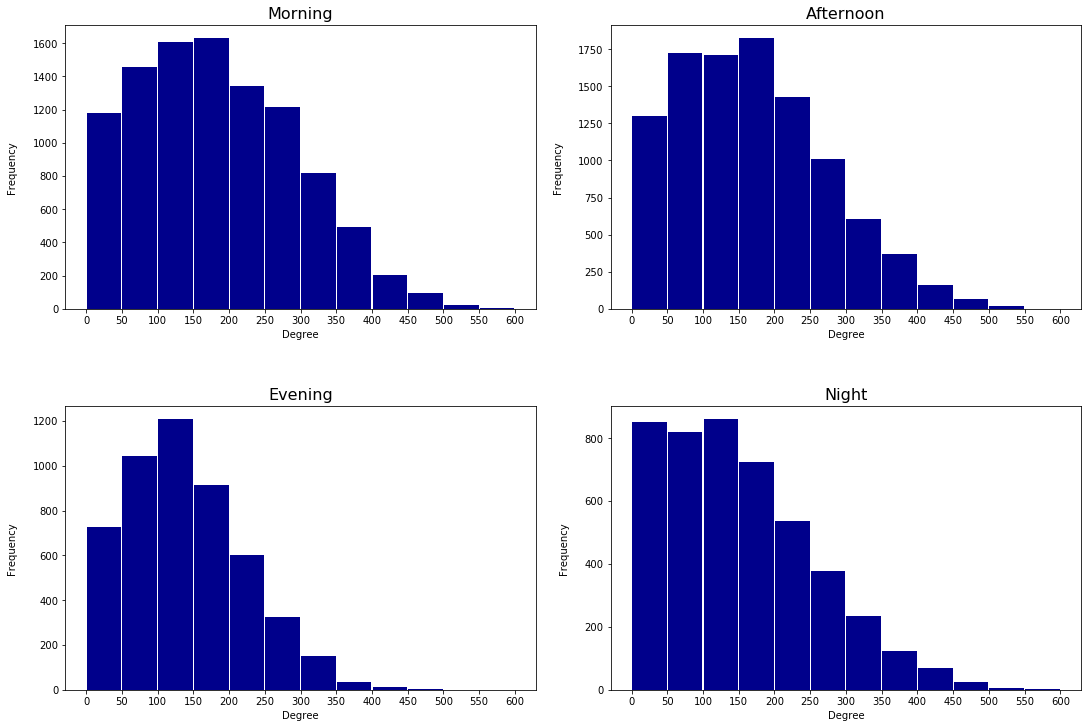

In [28]:
fig, axs = plt.subplots(2, 2, figsize = (15,10), constrained_layout=True)

#fig.suptitle('\nNode degree distribution\n', fontsize=20)

axs[0,0].hist([morning['degree']], 12, range=(0,600), rwidth=0.97, facecolor='darkblue', alpha=1)
axs[0,0].set_title('Morning', fontsize=16)
axs[0,0].set_xlabel('Degree')
axs[0,0].set_ylabel('Frequency\n')
axs[0,0].set_xticks(np.linspace(0,600,13))

axs[0,1].hist([afternoon['degree']], 12, range=(0,600), rwidth=0.97, facecolor='darkblue', alpha=1)
axs[0,1].set_title('Afternoon', fontsize=16)
axs[0,1].set_xlabel('Degree')
axs[0,1].set_ylabel('Frequency\n')
axs[0,1].set_xticks(np.linspace(0,600,13))

axs[1,0].hist([evening['degree']], 12, range=(0,600), rwidth=0.97, facecolor='darkblue', alpha=1)
axs[1,0].set_title('\n\nEvening', fontsize=16)
axs[1,0].set_xlabel('Degree')
axs[1,0].set_ylabel('Frequency\n')
axs[1,0].set_xticks(np.linspace(0,600,13))

axs[1,1].hist([night['degree']], 12, range=(0,600), rwidth=0.97, facecolor='darkblue', alpha=1)
axs[1,1].set_title('\n\nNight', fontsize=16)
axs[1,1].set_xlabel('Degree')
axs[1,1].set_ylabel('Frequency\n')
axs[1,1].set_xticks(np.linspace(0,600,13))


plt.savefig('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Plots\\S2_histogram2.png')

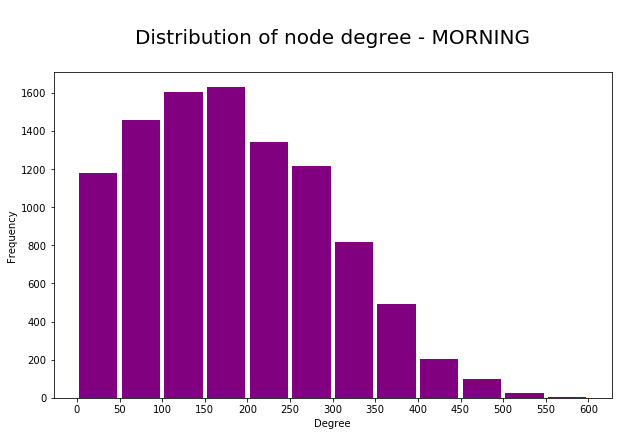

In [23]:
x = [morning['degree']]
num_bins = 12
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,600), rwidth=0.9, facecolor='purple', alpha=1)


plt.xticks(np.linspace(0,600,13))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('\nDistribution of node degree - MORNING\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)

#plt.box(on=None)

#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()

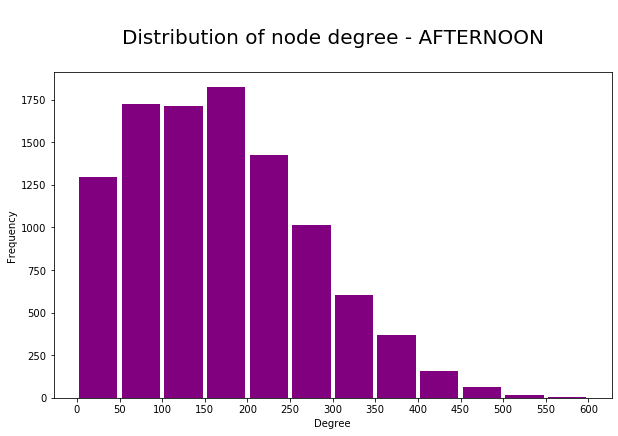

In [24]:
x = [afternoon['degree']]
num_bins = 12
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,600), rwidth=0.9, facecolor='purple', alpha=1)


plt.xticks(np.linspace(0,600,13))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('\nDistribution of node degree - AFTERNOON\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)

#plt.box(on=None)

#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()

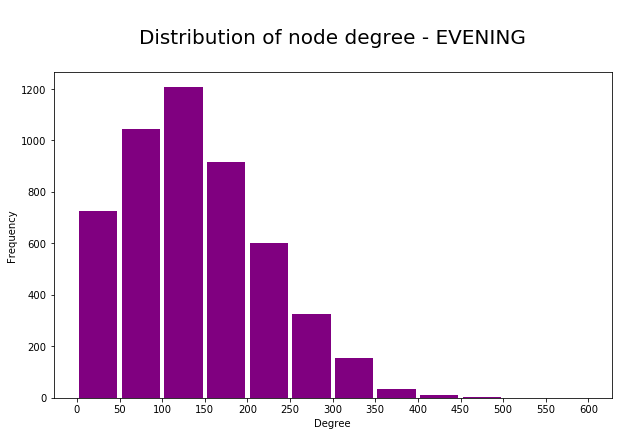

In [25]:
x = [evening['degree']]
num_bins = 12
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,600), rwidth=0.9, facecolor='purple', alpha=1)


plt.xticks(np.linspace(0,600,13))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('\nDistribution of node degree - EVENING\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)

#plt.box(on=None)

#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()

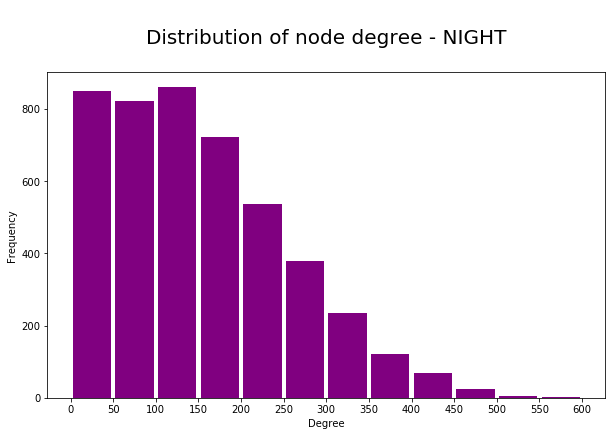

In [26]:
x = [night['degree']]
num_bins = 12
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,600), rwidth=0.9, facecolor='purple', alpha=1)


plt.xticks(np.linspace(0,600,13))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('\nDistribution of node degree - NIGHT\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)

#plt.box(on=None)

#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()

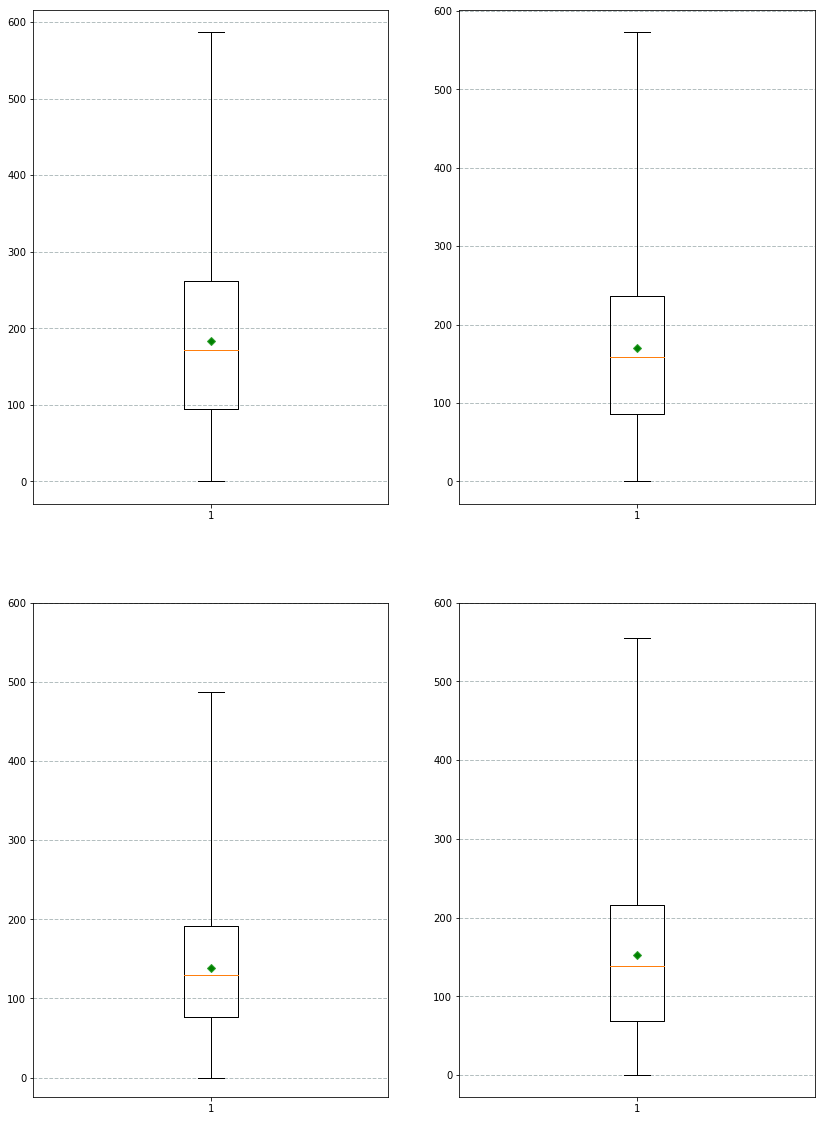

In [27]:
plt.figure(figsize=(14,20))


plt.title('\nNode degree Boxplot\n', fontsize=20)
plt.subplot(2,2,1)
diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(morning['degree'], whis='range', showmeans=True, meanprops=diamond)
plt.yticks(np.linspace(0,600,7))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

plt.subplot(2,2,2)
diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(afternoon['degree'], whis='range', showmeans=True, meanprops=diamond)
plt.yticks(np.linspace(0,600,7))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

plt.subplot(2,2,3)
diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(evening['degree'], whis='range', showmeans=True, meanprops=diamond)
plt.yticks(np.linspace(0,600,7))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

plt.subplot(2,2,4)
diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(night['degree'], whis='range', showmeans=True, meanprops=diamond)
plt.yticks(np.linspace(0,600,7))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

plt.show()

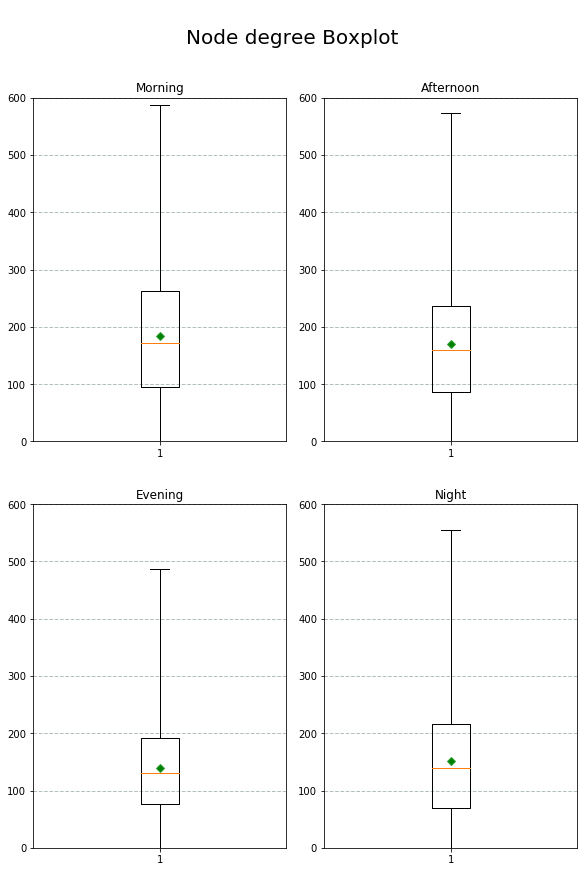

In [28]:
fig, axs = plt.subplots(2, 2, figsize = (8,12), constrained_layout=True)

fig.suptitle('\nNode degree Boxplot\n', fontsize=20)

diamond = dict(markerfacecolor='g', marker='D')

axs[0,0].boxplot(morning['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[0,0].set_title('Morning')
axs[0,0].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[0,0].set_ylim(0,600)

axs[0,1].boxplot(afternoon['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[0,1].set_title('Afternoon')
axs[0,1].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[0,1].set_ylim(0,600)

axs[1,0].boxplot(evening['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[1,0].set_title('\nEvening')
axs[1,0].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[1,0].set_ylim(0,600)

axs[1,1].boxplot(night['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[1,1].set_title('\nNight')
axs[1,1].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[1,1].set_ylim(0,600)


#plt.show()

plt.savefig('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Plots\\S2_boxplot.png')

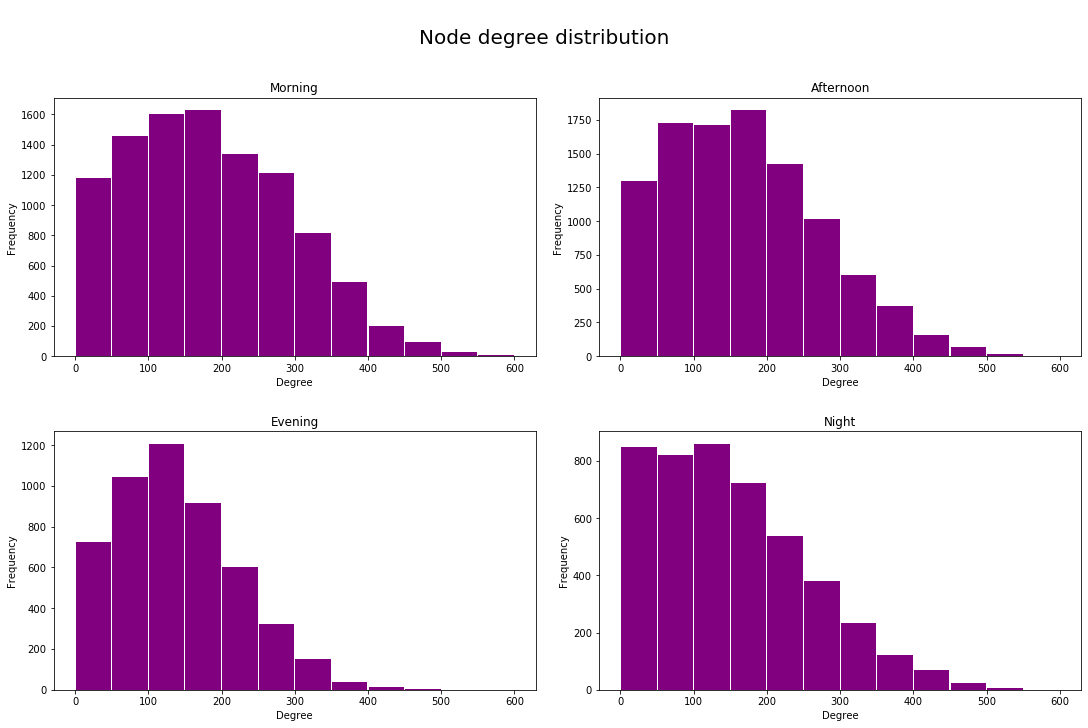

In [29]:
fig, axs = plt.subplots(2, 2, figsize = (15,10), constrained_layout=True)

fig.suptitle('\nNode degree distribution\n', fontsize=20)

axs[0,0].hist([morning['degree']], 12, range=(0,600), rwidth=0.97, facecolor='purple', alpha=1)
axs[0,0].set_title('Morning')
axs[0,0].set_xlabel('Degree')
axs[0,0].set_ylabel('Frequency')

axs[0,1].hist([afternoon['degree']], 12, range=(0,600), rwidth=0.97, facecolor='purple', alpha=1)
axs[0,1].set_title('Afternoon')
axs[0,1].set_xlabel('Degree')
axs[0,1].set_ylabel('Frequency')

axs[1,0].hist([evening['degree']], 12, range=(0,600), rwidth=0.97, facecolor='purple', alpha=1)
axs[1,0].set_title('\nEvening')
axs[1,0].set_xlabel('Degree')
axs[1,0].set_ylabel('Frequency')

axs[1,1].hist([night['degree']], 12, range=(0,600), rwidth=0.97, facecolor='purple', alpha=1)
axs[1,1].set_title('\nNight')
axs[1,1].set_xlabel('Degree')
axs[1,1].set_ylabel('Frequency')


plt.savefig('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Plots\\S2_histogram.png')

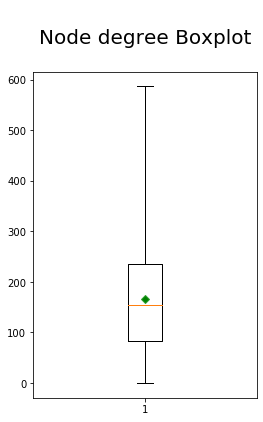

In [12]:
diamond = dict(markerfacecolor='g', marker='D')
x = [data['degree']]
plt.figure(figsize=(4,6))
plt.boxplot(x, whis='range', showmeans=True, meanprops=diamond)

plt.xticks()
plt.yticks(np.linspace(0,600,7))
#plt.xlabel('Degree')
#plt.ylabel('Frequency')
plt.title('\nNode degree Boxplot\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)
#plt.box(on=None)
#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()

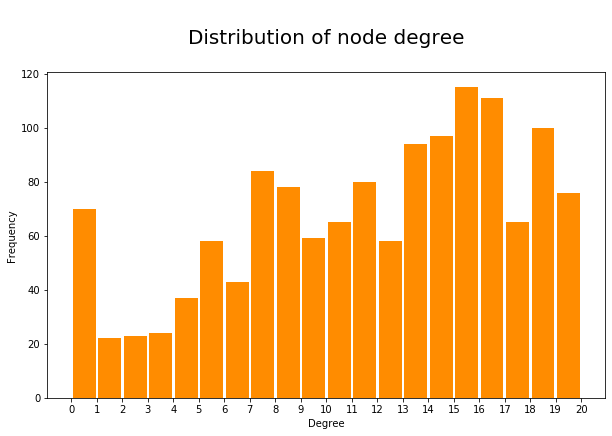

In [15]:
x = [small_deg['degree']]
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,20), rwidth=0.9, facecolor='darkorange', alpha=1)


plt.xticks(np.linspace(0,20,21))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('\nDistribution of node degree\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)

#plt.box(on=None)

#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()

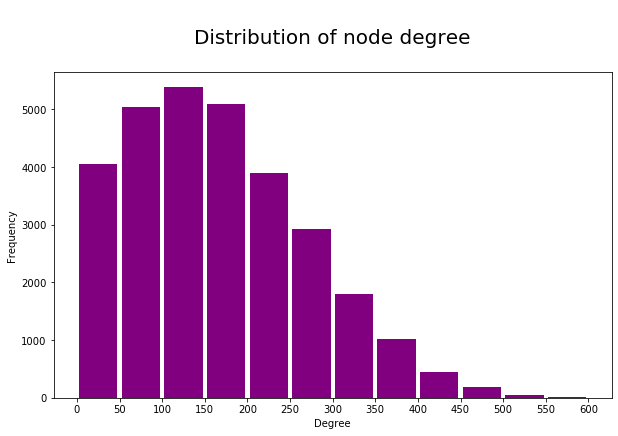

In [13]:
x = [data['degree']]
num_bins = 12
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,600), rwidth=0.9, facecolor='purple', alpha=1)


plt.xticks(np.linspace(0,600,13))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('\nDistribution of node degree\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)

#plt.box(on=None)

#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()